In [19]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import h5py
import sklearn
from sklearn.model_selection import train_test_split
from collections import Counter
import glob
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import train
from random import shuffle
import imp
import os
from PIL import Image, ImageFont, ImageDraw, ImageEnhance
%matplotlib inline

In [20]:
characters = [k.split('/')[2] for k in glob.glob('./characters/*') if len([p for p in glob.glob(k+'/*') if 'edited' in p or 'pic_vid' in p]) > 290]
map_characters = dict(enumerate(characters))
map_characters = {0: 'abraham_grampa_simpson', 1: 'apu_nahasapeemapetilon', 2: 'bart_simpson'}

In [21]:
imp.reload(train)
## Just creating dataset
X_train, X_test, y_train, y_test = train.get_dataset(save=True)

Train (125, 64, 64, 3) (125, 3)
Test (23, 64, 64, 3) (23, 3)
apu_nahasapeemapetilon : 46 train pictures & 4 test pictures
abraham_grampa_simpson : 43 train pictures & 5 test pictures
bart_simpson : 36 train pictures & 14 test pictures


#### Four convulational layers

##### Same pictures training/testing

In [22]:
## Training in the notebook
X_train, X_test, y_train, y_test = train.get_dataset()
model, opt = train.create_model_four_conv(X_train.shape[1:])
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
model, history = train.training(model, X_train, X_test, y_train, y_test, data_augmentation=True)
model.save('modelo_treinado.h5')

## Training on AWS
# X_train, X_test, y_train, y_test = train.get_dataset(load=True)
# model = keras.models.load_model('./models/model_08_06.h5')
# with open('./models/history06_19.pkl', 'rb') as f:
#     history = pickle.load(f)
    
## Loading from callbacks
# imp.reload(train)
# model = train.load_model_from_checkpoint('./models/weights.best_6conv2.hdf5', six_conv=True)
# y_pred = model.predict(X_test)
# print('\n', sklearn.metrics.classification_report(np.where(y_test > 0)[1], 
#                                                   np.argmax(y_pred, axis=1), 
#                                                   target_names=list(map_characters.values())), sep='')

Train (125, 64, 64, 3) (125, 3)
Test (23, 64, 64, 3) (23, 3)
bart_simpson : 44 train pictures & 6 test pictures
apu_nahasapeemapetilon : 42 train pictures & 8 test pictures
abraham_grampa_simpson : 39 train pictures & 9 test pictures


c:\Users\catar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\optimizers\legacy\rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
c:\Users\catar\Downloads\SimpsonRecognition-master\SimpsonRecognition-master\train.py:213: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train, y_train,


Epoch 1/40
3/3 [==============================] - 14s 4s/step - loss: 7459.4961 - accuracy: 0.3441 - val_loss: 7.8204 - val_accuracy: 0.3913 - lr: 0.0100
Epoch 2/40
3/3 [==============================] - 10s 3s/step - loss: 22.7439 - accuracy: 0.3548 - val_loss: 1.1302 - val_accuracy: 0.2609 - lr: 0.0100
Epoch 3/40
3/3 [==============================] - 9s 3s/step - loss: 1.1035 - accuracy: 0.3548 - val_loss: 1.1164 - val_accuracy: 0.2609 - lr: 0.0100
Epoch 4/40
3/3 [==============================] - 10s 4s/step - loss: 1.0999 - accuracy: 0.3548 - val_loss: 1.1098 - val_accuracy: 0.2609 - lr: 0.0100
Epoch 5/40
3/3 [==============================] - 8s 3s/step - loss: 1.1038 - accuracy: 0.3118 - val_loss: 1.1127 - val_accuracy: 0.2609 - lr: 0.0100
Epoch 6/40
3/3 [==============================] - 8s 3s/step - loss: 1.1134 - accuracy: 0.2903 - val_loss: 1.1054 - val_accuracy: 0.2609 - lr: 0.0100
Epoch 7/40
3/3 [==============================] - 9s 3s/step - loss: 1.1040 - accuracy: 0.322

ValueError: x and y must have same first dimension, but have shapes (200,) and (40,)

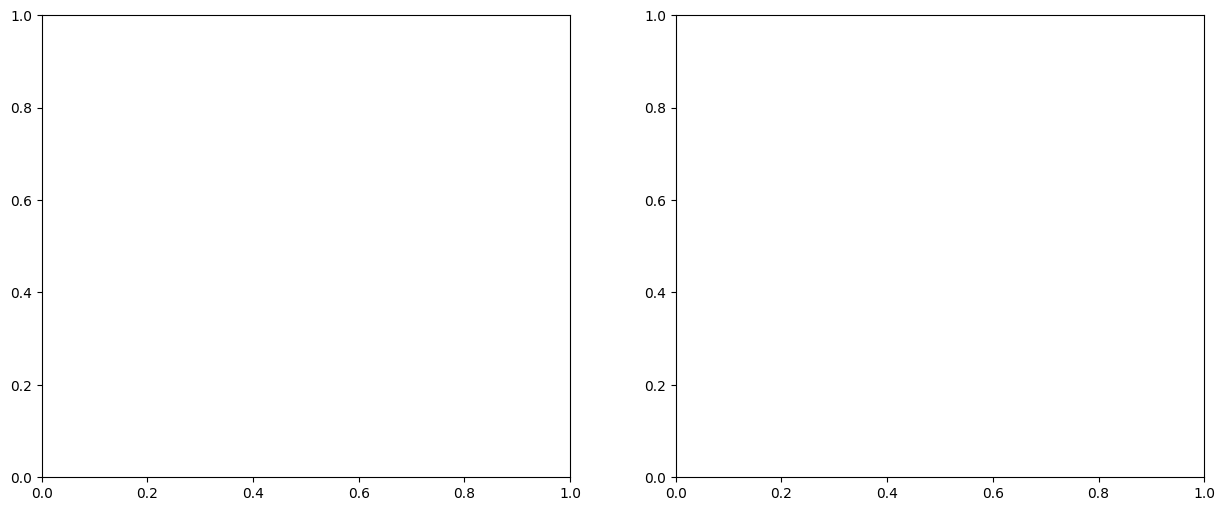

In [15]:
epochs= range(200)
f, ax = plt.subplots(ncols=2, figsize=(15,6))

# Acessar as métricas do histórico
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plotar as curvas de perda
ax[0].plot(epochs, loss, label='loss')
ax[0].plot(epochs, val_loss, label='val_loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()

# Plotar as curvas de acurácia
ax[1].plot(epochs, accuracy, label='acc')
ax[1].plot(epochs, val_accuracy, label='val_acc')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

plt.show()


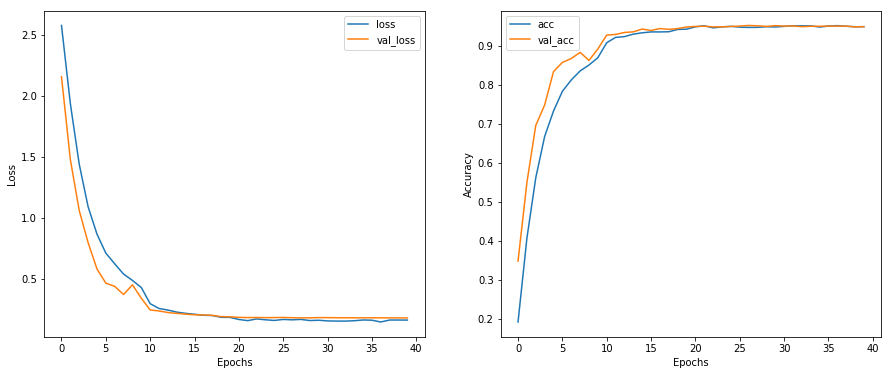

In [24]:
with open('./models/history06_19.pkl', 'rb') as f:
    history = pickle.load(f)
epochs= range(40)
f, ax = plt.subplots(ncols=2, figsize=(15,6))
ax[0].plot(epochs, history['loss'], label='loss')
ax[0].plot(epochs, history['val_loss'], label='val_loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[1].plot(epochs, history['acc'], label='acc')
ax[1].plot(epochs, history['val_acc'], label='val_acc')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

1/1 [==============================] - 1s 757ms/step


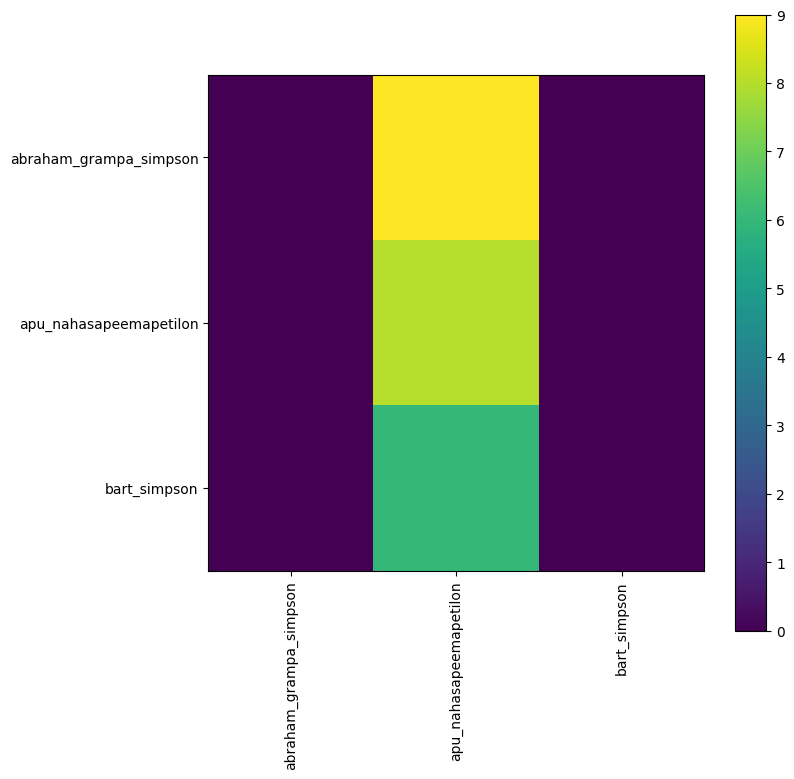

In [23]:
plt.figure(figsize=(8,8))
y_pred = model.predict(X_test)
cnf_matrix = sklearn.metrics.confusion_matrix(np.where(y_test > 0)[1], np.argmax(y_pred, axis=1))
classes = list(map_characters.values())
plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

##### With BGR/RGB

In [24]:
X_test2 = []
for img in X_test:
    X_test2.append(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
X_test2 = np.array(X_test2)
model = keras.models.load_model('./modelo_treinado.h5')
y_pred = model.predict(X_test2)
print('\n', sklearn.metrics.classification_report(np.where(y_test > 0)[1], 
                                                  np.argmax(y_pred, axis=1), 
                                                  target_names=list(map_characters.values())), sep='')

1/1 [==============================] - 1s 821ms/step

                        precision    recall  f1-score   support

abraham_grampa_simpson       0.00      0.00      0.00         9
apu_nahasapeemapetilon       0.35      1.00      0.52         8
          bart_simpson       0.00      0.00      0.00         6

              accuracy                           0.35        23
             macro avg       0.12      0.33      0.17        23
          weighted avg       0.12      0.35      0.18        23



c:\Users\catar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\catar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\catar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

#### Six convolutional layers 

In [19]:
## Training on AWS
X_train, X_test, y_train, y_test = train.get_dataset(load=True)
model = keras.models.load_model('./models/model_sixconv.h5')
with open('./models/history2.pkl', 'rb') as f:
    history = pickle.load(f)
y_pred = model.predict(X_test)
print('\n', sklearn.metrics.classification_report(np.where(y_test > 0)[1], 
                                                  np.argmax(y_pred, axis=1), 
                                                  target_names=list(map_characters.values())), sep='')

Train (6893, 64, 64, 3) (6893, 10)
Test (766, 64, 64, 3) (766, 10)

                          precision    recall  f1-score   support

  abraham_grampa_simpson       0.93      0.95      0.94        58
            bart_simpson       0.83      0.89      0.86        89
charles_montgomery_burns       0.87      0.68      0.76        76
           homer_simpson       0.90      0.94      0.92       147
        krusty_the_clown       0.91      0.98      0.94        41
            lisa_simpson       0.90      0.85      0.87       102
           marge_simpson       0.96      0.95      0.96       108
             moe_szyslak       0.80      0.89      0.84        45
            ned_flanders       0.93      0.86      0.89        59
            sideshow_bob       0.84      0.93      0.88        41

             avg / total       0.89      0.89      0.89       766



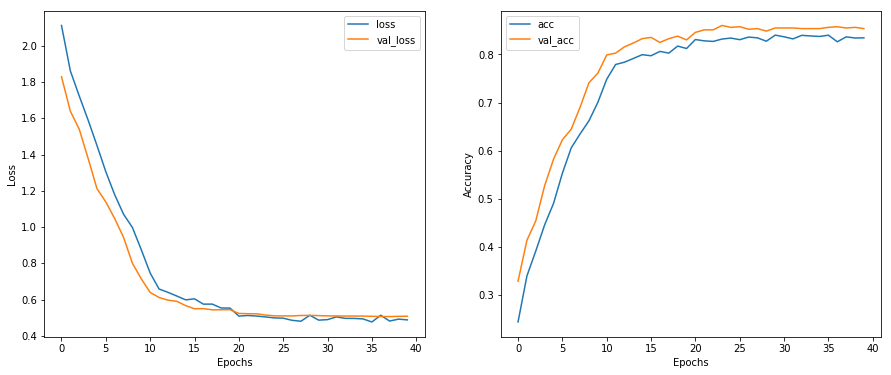

In [21]:
epochs= range(40)
f, ax = plt.subplots(ncols=2, figsize=(15,6))
ax[0].plot(epochs, history['loss'], label='loss')
ax[0].plot(epochs, history['val_loss'], label='val_loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[1].plot(epochs, history['acc'], label='acc')
ax[1].plot(epochs, history['val_acc'], label='val_acc')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

In [22]:
## -> More overfitting

#### Predict from url

In [340]:
import urllib
def url_to_image(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    return image

def plot_and_predict(url, all_perc=False):
    image = url_to_image(url)
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    pic = cv2.resize(image, (pic_size,pic_size))
    a = model.predict_proba(pic.reshape(1, pic_size, pic_size,3))[0]
    if all_perc:
        print('\n'.join(['{} : {}%'.format(map_characters[i], round(k*100)) for i,k in sorted(enumerate(a), key=lambda x:x[1], reverse=True)]))
    else:
        return map_characters[np.argmax(a)].replace('_',' ').title()

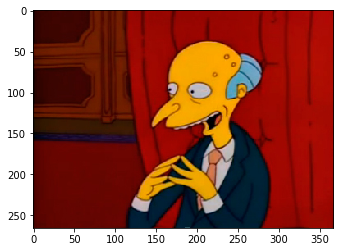

1/1 [==============================] - 0s


'Charles Montgomery Burns'

In [345]:
url = "https://vignette3.wikia.nocookie.net/simpsons/images/2/25/Adult_burns.jpg/revision/latest?cb=20111012170021"
plot_and_predict(url)

#### Generating and plotting

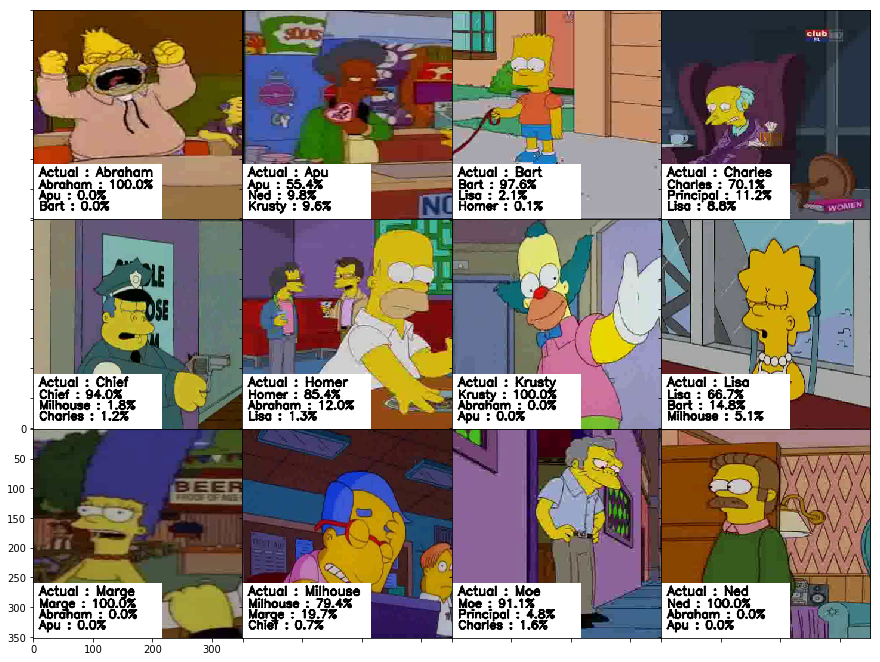

In [451]:
from mpl_toolkits.axes_grid1 import AxesGrid
map_characters = {0: 'abraham_grampa_simpson', 1: 'apu_nahasapeemapetilon', 2: 'bart_simpson', 
    3: 'charles_montgomery_burns', 4: 'chief_wiggum', 5: 'homer_simpson', 
    6: 'krusty_the_clown', 7: 'lisa_simpson', 8: 'marge_simpson', 
    9: 'milhouse_van_houten', 10: 'moe_szyslak', 11: 'ned_flanders', 
    12: 'principal_skinner', 13: 'sideshow_bob'}

F = plt.figure(1, (15,20))
grid = AxesGrid(F, 111,  # similar to subplot(141)
                nrows_ncols=(3, 4),
                axes_pad=0,
                label_mode="1")

for i in range(12):
    char = map_characters[i]
    image = cv2.imread(np.random.choice([k for k in glob.glob('./characters/%s/*' % char) if 'pic_vid' in k]))
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    pic = cv2.resize(image, (64, 64)).astype('float32') / 255.
    a = model.predict(pic.reshape(1, 64, 64,3))[0]
    actual = char.split('_')[0].title()
#     pred = map_characters[np.argmax(a)].split('_')[0].title()
    text = sorted(['{:s} : {:.1f}%'.format(map_characters[k].split('_')[0].title(), 100*v) for k,v in enumerate(a)], 
       key=lambda x:float(x.split(':')[1].split('%')[0]), reverse=True)[:3]
    img = cv2.resize(img, (352, 352))
    cv2.rectangle(img, (0,260),(215,352),(255,255,255), -1)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img, 'Actual : %s' % actual, (10, 280), font, 0.7,(0,0,0),2,cv2.LINE_AA)
    for k, t in enumerate(text):
        cv2.putText(img, t,(10, 300+k*18), font, 0.65,(0,0,0),2,cv2.LINE_AA)
#     cv2.putText(img, 'Pred : %s' % pred, (100, 310), font, 0.7,(0,0,0),2,cv2.LINE_AA)    
    grid[i].imshow(img)

#### Finding a threshold

In [287]:
y_pred = model.predict(X_test, verbose=0)
comp = np.argmax(y_test, axis=1) == np.argmax(y_pred, axis=1)
index_good, index_false = [i for i, x in enumerate(comp) if x], [i for i, x in enumerate(comp) if not x]

In [290]:
max_good = np.max(y_pred[index_good], axis=1)
max_wrong = np.max(y_pred[index_false], axis=1)
diff_good = np.diff(np.sort(y_pred[index_good], axis=1)[:, 16:])
diff_wrong = np.diff(np.sort(y_pred[index_false], axis=1)[:, 16:])
std_good = np.std(y_pred[index_good], axis=1)
std_wrong = np.std(y_pred[index_false], axis=1)

print("For good predictions : Max : {:.2f}, Difference Two First : {:.3f}, STD : {:.2f}".format(np.mean(max_good),
                                                                            np.mean(diff_good),
                                                                            np.mean(std_good)))
print("For wrong predictions : Max : {:.2f}, Difference Two First : {:.3f}, STD : {:.2f}".format(np.mean(max_wrong),
                                                                             np.mean(diff_wrong),
                                                                            np.mean(std_wrong)))

For good predictions : Max : 0.84, Difference Two First : 0.786, STD : 0.19
For wrong predictions : Max : 0.37, Difference Two First : 0.200, STD : 0.09


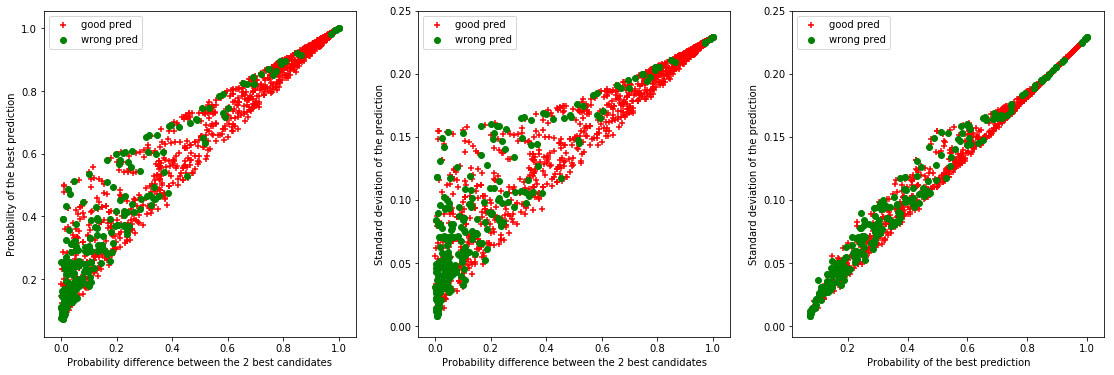

In [291]:
f, ax = plt.subplots(ncols=3, figsize=(19,6))
ax[0].scatter(x = diff_good, y= max_good, c='red', marker='+', label = 'good pred')
ax[0].scatter(x = diff_wrong, y= max_wrong, c='green', marker='o', label = 'wrong pred')
ax[0].legend()
ax[0].set_xlabel('Probability difference between the 2 best candidates')
ax[0].set_ylabel('Probability of the best prediction')

ax[1].scatter(x = diff_good, y= std_good, c='red', marker='+', label = 'good pred')
ax[1].scatter(x = diff_wrong, y= std_wrong, c='green', marker='o', label = 'wrong pred')
ax[1].legend()
ax[1].set_xlabel('Probability difference between the 2 best candidates')
ax[1].set_ylabel('Standard deviation of the prediction')

ax[2].scatter(x = max_good, y= std_good, c='red', marker='+', label = 'good pred')
ax[2].scatter(x = max_wrong, y= std_wrong, c='green', marker='o', label = 'wrong pred')
ax[2].legend()
ax[2].set_xlabel('Probability of the best prediction')
ax[2].set_ylabel('Standard deviation of the prediction')

In [284]:
## FOR LISA
id_lisa = 10
index_lisa = [i for i, x in enumerate(np.argmax(y_pred, axis= 1) == id_lisa) if x]
index_good_lisa, index_wrong_lisa = [k for k in index_lisa if k in index_good], [k for k in index_lisa if k in index_false]

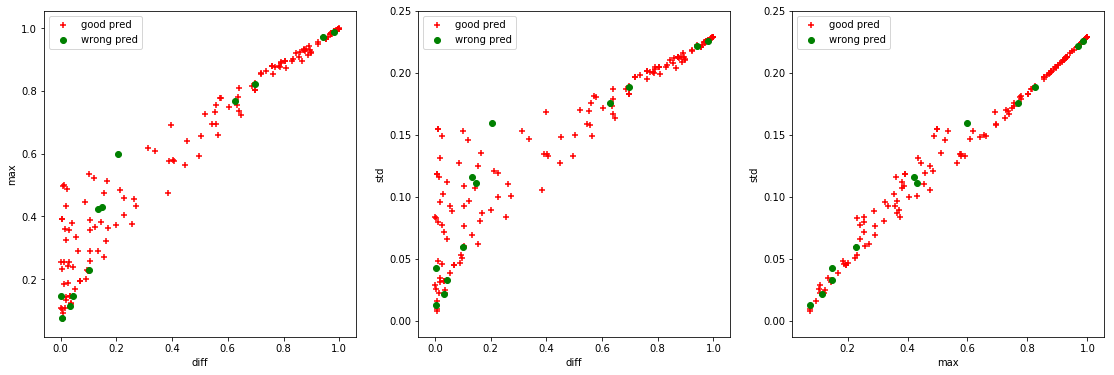

In [286]:
dicts = {'max':{'good':np.max(y_pred[index_good_lisa], axis=1), 
                'wrong': np.max(y_pred[index_wrong_lisa], axis=1)},
        'diff':{'good':np.diff(np.sort(y_pred[index_good_lisa], axis=1)[:, 16:]), 
                'wrong': np.diff(np.sort(y_pred[index_wrong_lisa], axis=1)[:, 16:])}, 
        'std':{'good': np.std(y_pred[index_good_lisa], axis=1), 
                'wrong': np.std(y_pred[index_wrong_lisa], axis=1)}}

import itertools
chosen = list(itertools.combinations(dicts.items(),2))
f, ax = plt.subplots(ncols=3, figsize=(19,6))
for i in range(3):
    ax[i].scatter(x = chosen[i][0][1]['good'], y= chosen[i][1][1]['good'], 
                  c='red', marker='+', label = 'good pred')
    ax[i].scatter(x = chosen[i][0][1]['wrong'], y= chosen[i][1][1]['wrong'], 
                  c='green', marker='o', label = 'wrong pred')
    ax[i].legend()
    ax[i].set_xlabel(chosen[i][0][0])
    ax[i].set_ylabel(chosen[i][1][0])

#### Threshold and Precision/Recall

In [407]:
y_pred = model.predict(X_test, verbose=0)
indices = [round(k*0.01,2) for k in range(0, 100, 5)] + [0.99]
pos_characters = {cl: {k:[] for k in indices} for cl in map_characters}
for k in indices:
    for i, e in enumerate(y_pred):
        if np.max(e) > k:
            pos_characters[np.argmax(e)][k].append(int(np.argmax(e) == np.argmax(y_test[i])))
pos_characters['ALL'] = {k:np.sum([pos_characters[cl][k] for cl in pos_characters]) for k in indices}                 

In [458]:
indices = [round(k*0.01, 2)+round(p*0.01,2) for k,p in zip(range(0, 20), range(0, 100, 5))]
pos_characters_2 = {cl: {k:[] for k in indices} for cl in map_characters}
for k in indices:
    for i, e in enumerate(y_pred):
        if np.std(e)+np.max(e) > k:
            pos_characters_2[np.argmax(e)][k].append(int(np.argmax(e) == np.argmax(y_test[i])))
pos_characters_2['ALL'] = {k:np.sum([pos_characters_2[cl][k] for cl in pos_characters_2]) for k in indices}                 

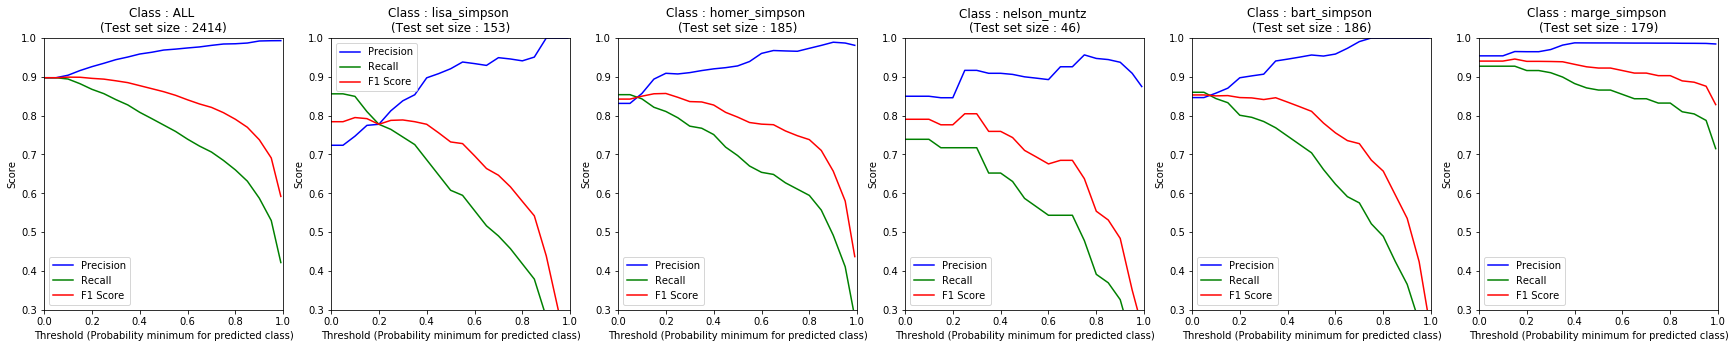

In [432]:
classes_plot = ["ALL", 10, 7, 15, 2, 11]
tr = {"ALL": np.argmax(y_test, axis=1)}
f, ax = plt.subplots(ncols=len(classes_plot), figsize=(len(classes_plot)*5, 5))
for i, cl_plt in enumerate(classes_plot):
    precision = {k:np.sum(pos_characters[cl_plt][k])/len(pos_characters[cl_plt][k]) for k in indices}
    recall = {k:np.sum(pos_characters[cl_plt][k])/np.sum(np.argmax(y_test, axis=1)==tr.get(cl_plt, cl_plt))for k in indices}
    f1_score = {k:(2*precision[k]*recall[k])/(precision[k]+recall[k]) for k in indices}
    x,y = zip(*sorted(precision.items()))
    ax[i].plot(x, y, color='blue', label='Precision')
    x,y = zip(*sorted(recall.items()))
    ax[i].plot(x, y, label='Recall', color='green')
    x,y = zip(*sorted(f1_score.items()))
    ax[i].plot(x, y, color='red', label='F1 Score')
    _ = ax[i].set_xlim((0,1))
    _ = ax[i].set_ylabel('Score')
    _ = ax[i].set_xlabel('Threshold (Probability minimum for predicted class)')
    _ = ax[i].set_ylim((0.3,1))
    _ = ax[i].legend()
    _ = ax[i].set_title('Class : %s \n(Test set size : %d)' % (map_characters.get(cl_plt, cl_plt), np.sum(np.argmax(y_test, axis=1) == tr.get(cl_plt, cl_plt))))

#### Attention maps

/Users/alexandreattia/Desktop/Work/workenv/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Working on filters: [6]


/Users/alexandreattia/Desktop/Work/workenv/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Working on filters: [3]


/Users/alexandreattia/Desktop/Work/workenv/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Working on filters: [1]


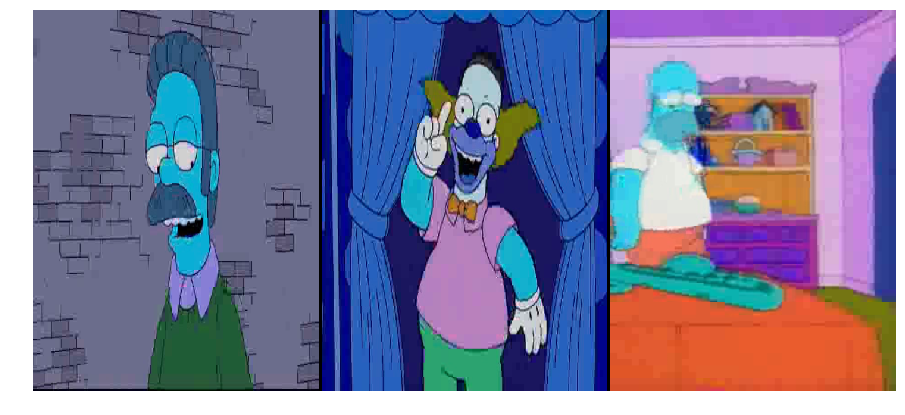

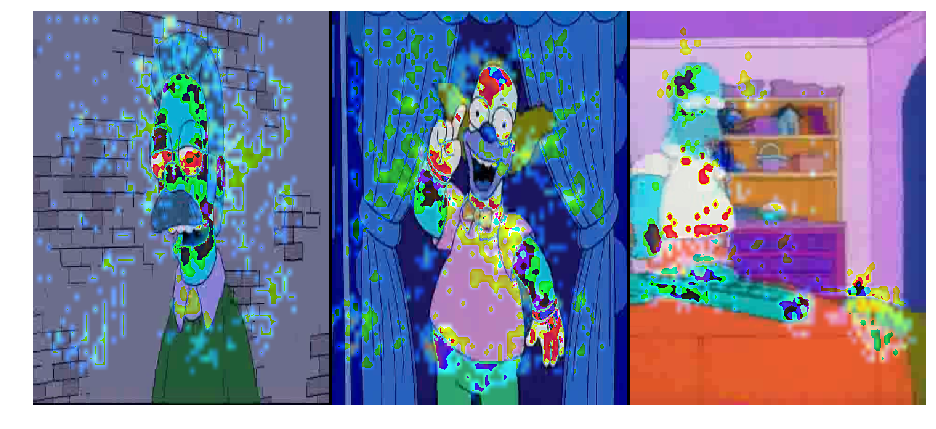

In [122]:
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import preprocess_input

from vis.utils import utils
from vis.visualization import visualize_saliency

# The name of the layer we want to visualize
# (see model definition in vggnet.py)
layer_idx = [idx for idx, layer in enumerate(model.layers)][16]

# Images corresponding to tiger, penguin, dumbbell, speedboat, spider
image_paths = np.random.choice(np.concatenate([glob.glob('./characters/%s/*.jpg' % k) for k in map_characters.values()]), 3)

heatmaps = []
true_img = []
d=[]
for path in image_paths:
    seed_img = utils.load_img(path, target_size=(64, 64)).astype('float32') / 255.
    seed_img  = seed_img.reshape((1, 64, 64, 3))
    pred_class = np.argmax(model.predict(seed_img))

    # Here we are asking it to show attention such that prob of `pred_class` is maximized.
    heatmap = visualize_saliency(model, layer_idx, [pred_class], seed_img.reshape((64, 64, 3)))
    heatmaps.append(heatmap * 255.) 
    true_img.append(cv2.resize(cv2.imread(path),(480,640)))
    d.append(cv2.resize(cv2.imread(path),(480,640)) + cv2.resize(heatmap,(480,640)))

plt.figure(figsize=(14,5))
plt.axis('off')
plt.imshow(utils.stitch_images(true_img))
plt.show()

plt.figure(figsize=(14,5))
plt.axis('off')
plt.imshow(utils.stitch_images(d))
plt.show()

#### Visualizing weights

#### Create video

In [182]:
m, s = 5, 7
cap = cv2.VideoCapture("video1.avi") 
nb_frames = 2500

fps = cap.get(cv2.CAP_PROP_FPS)
cap.set(1, fps*(m*60+s))
for i in range(4000):
    ret, frame = cap.read()
    if i % 15 == 0:
        img = cv2.resize(frame, (64, 64)).astype('float32') / 255.
        a = model.predict(img.reshape((-1, 64, 64, 3)), verbose=0)[0]
        text = sorted(['{:s} : {:.1f}%'.format(map_characters[k].split('_')[0].title(), 100*v) for k,v in enumerate(a)], 
               key=lambda x:float(x.split(':')[1].split('%')[0]), reverse=True)[:3]
    im = frame
    cv2.rectangle(im, (int(frame.shape[1] * 0.6),int(frame.shape[0] * 0.7)),(frame.shape[1],frame.shape[0]),(255,255,255), -1)
    font = cv2.FONT_HERSHEY_SIMPLEX
    for k, t in enumerate(text):
        cv2.putText(im,t,
                    ((int(frame.shape[1] * 0.6 + 10), int(frame.shape[0] * 0.7 + 20 +k*25))), 
                    font, 0.8,(0,0,0),2,cv2.LINE_AA)
    cv2.imwrite('./video_created/vid_{0:0=4d}.jpg'.format(i), im)
 
# !ffmpeg -f image2 -r 25 -i ./video_created/vid_%04d.jpg -vcodec mpeg4 -y ./video_created/movie3.mp4

# for i in glob.glob('./video_created/*.jpg'):
#     os.remove(i)

error: /opt/local/var/macports/build/_opt_local_var_macports_sources_rsync.macports.org_release_tarballs_ports_graphics_opencv/opencv/work/opencv-3.2.0/modules/imgproc/src/imgwarp.cpp:3492: error: (-215) ssize.width > 0 && ssize.height > 0 in function resize


In [488]:
!ffmpeg -f image2 -r 25 -i ./video_created/video_%05d.jpg -vcodec mpeg4 -y ./video_created/movie4.mp4

ffmpeg version 3.2.4 Copyright (c) 2000-2017 the FFmpeg developers
  built with Apple LLVM version 8.0.0 (clang-800.0.42.1)
  configuration: --prefix=/opt/local --enable-swscale --enable-avfilter --enable-avresample --enable-libmp3lame --enable-libvorbis --enable-libopus --enable-libtheora --enable-libschroedinger --enable-libopenjpeg --enable-libmodplug --enable-libvpx --enable-libsoxr --enable-libspeex --enable-libass --enable-libbluray --enable-lzma --enable-gnutls --enable-fontconfig --enable-libfreetype --enable-libfribidi --disable-libxcb --disable-libxcb-shm --disable-libxcb-xfixes --disable-indev=jack --disable-outdev=xv --enable-audiotoolbox --enable-sdl2 --mandir=/opt/local/share/man --enable-shared --enable-pthreads --cc=/usr/bin/clang --enable-vda --enable-videotoolbox --arch=x86_64 --enable-yasm --enable-libx265 --enable-gpl --enable-postproc --enable-libx264 --enable-libxvid
  libavutil      55. 34.101 / 55. 34.101
  libavcodec     57. 64.101 / 57. 64.101
  libavformat   